<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/2.Model-linearization%20/Linearizacao-de-modelo-nao-linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/cabe%C3%A7alho-geral.jpg?raw=true" width="700" height="175">
</left>

# Linearização de modelos não lineares

# Introdução
A linearização de modelos não lineares pode ser útil em muitas situações. Como exemplo, a Figura 1 mostra uma aproximação linear para a expressão $y(x)=x^3+1$, fazendo a expansão em série de Taylor no ponto $x_s=6$ (referência). A expressão linearizada $y_{linear}(x)=y(x_s )+(3x_s^2)(x-x_s)$ representa o comportamento não linear na região próxima à referência.

<br>
<div style="text-align:center">
    <img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/aprox_linear_.jpg?raw=true" width="auto" height="200" alt="Descrição da Imagem">
</div>

Figura 1 - Desempenho de uma aproximação linear para a expressão $y(x)=x^3+1$.

Ao se distanciar, o desempenho da linearização deteriora-se. Mas, se fosse desejado analisar o problema original apenas nas proximidades da referência, a versão linearizada pode ser utilizada sem prejuízo, de modo que $y(x)≈y_{linear}(x)$.

Em função de não linearidades nos processos químicos, é importante considerar a aproximação linear para viabilizar o uso de *técnicas clássicas de controle*. Neste caso, os modelos são linearizados em torno de uma condição operacional em que o controle deve regular o processo.

O modelo linearizado é muito útil na análise de estabilidade do processo, em função do comportamento do sistema linear. Outras propriedades intrínsecas do sistema também podem ser avaliadas (controlabilidade, observabilidade, funções de transferência, projeto de controladores, ...). Contudo, lembre-se sempre que grandes mudanças nas condições de um processo não linear não podem ser muito bem aproximadas por expressões lineares.

Para evitar o esforço manual, a linearização pode ser realizada no computador, baseando-se na perturbação numérica das variáveis do modelo. Nesta prática, será feita a implementação de modelo não linear e sua linearização de um modelo empregando o Python para demostrar que, no dia a dia, esta tarefa pode ser bastante facilitada. O modelo não linear implementado também pode ser usado para simulação do processo.

# Usando a biblioteca *Sympy* (opcional)

É um caminho interessante para problemas mais simples. Supondo uma função não-linear dada por $f=f(x)$, é possível linearizar usando matemática simbólica no Python, como é o caso da biblioteca SymPy. Isso é feito para obter a derivada $f^x=∂f/∂x$ necessária para aproximar o modelo em $(x_s)$, tal que

$$f(x)≈f(x_s)+f^x (x_s) (x-x_s )$$

Neste caso, basta importar a biblioteca SymPy, instanciar as variáveis com o método symbols, definir a expressão da função e proceder a derivação como método diff, indicando a função a ser derivada e a respectiva variável. Por exemplo, considere a obtenção das derivadas parciais para a função $f(x)=x^2+cos⁡(x)$. A partir do resultado simbólico, pode-se chegar à função linearizada, tal que $f(x)≈f(x_s)+ [2x_s-sin⁡(x_s)](x-x_s )$.

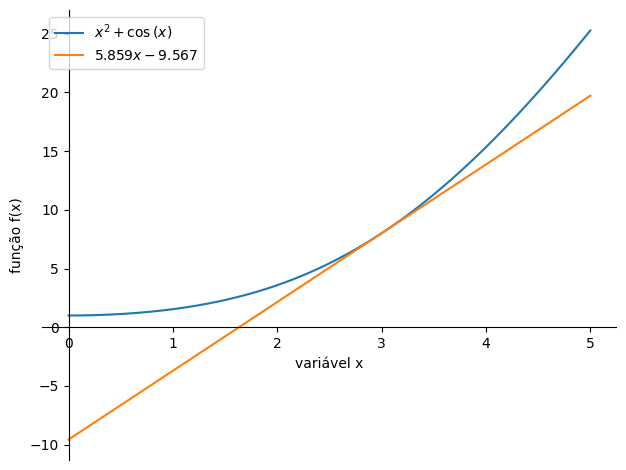

In [1]:
# Importando as bibliotecas
import sympy as sp

# Instanciando as variáveis
x = sp.symbols('x')

# Definindo a função das variáveis
f = x**2 + sp.cos(x)

# Calculando a derivada parcial, f_x
fx = sp.diff(f,x)

# Especificando o ponto de linearização
x_s = 3.0
ponto = {x:x_s}

# Obtendo a expressão linerizada
f_linear = f.subs(ponto) + fx.subs(ponto)*(x-x_s)

# Simplificando os coeficientes para 4 casas decimais e observando o comportamento gráfico
from sympy.plotting import plot

for coeff in sp.preorder_traversal(f_linear):
    if isinstance(coeff, sp.Float):
       f_linear = f_linear.subs(coeff, round(coeff, 3))

h = plot(f, f_linear, (x, 0, 5),
     xlabel='variável x', ylabel='função f(x)', legend=True);

# Usando a biblioteca *Python-Control*


O procedimento a ser seguido agora se baseia na função linearize presente na biblioteca Python Control Systems (python-control). É um pacote com um conjunto de métodos e funções para implementar operações básicas para análise e projeto de sistemas de controle feedback. Ele requer as bibliotecas usuais numpy, scipy e matplotlib. Mais detalhes podem ser vistos na documentação em: https://python-control.readthedocs.io. A seguir, são apresentados os passos do procedimento:

## 1. Instalar o pacote python-control.

No Spyder/Anaconda, o pacote pode ser instalado usando o comando pip no prompt do console na janela principal ou no *prompt do Anaconda* (recomendado).
Para isso, digite: **pip install -U control** (ou então **conda install -c conda-forge control**) como mostrado no recorte, e confirme com a tecla ENTER.A instalação exige conexão com a internet e será automática. O Python pode pedir para reiniciar o console para ativar o pacote. Basta fazer essa instalação apenas uma vez em cada computador em que você for trabalhar.

<br>
<div style="text-align:center">
    <img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/recorte_controle.png.jpg?raw=true" width="auto" height="80" alt="Descrição da Imagem">
</div>



OBS: Algumas rotinas requerem a biblioteca *slycot* para implementar recursos mais avançados (incluindo algumas funcionalidades MIMO). Por isso, sua instalação é recomendada: **conda install -c conda-forge slycot**

Para instalar no Google Colab  (a cada vez que precisar rodar seu código), faça o seguinte: **! pip install -qq control.**

Essa linha de código é usada para instalar a biblioteca `control` silenciosamente (sem exibir mensagens durante o processo de instalação).

O `!` no início da linha é um atalho no Google Colab para executar comandos de terminal. Nesse caso, o comando `pip` é usado para instalar pacotes Python, e o argumento `-qq` é uma opção para reduzir a saída do instalador, tornando-a mais concisa e ocultando mensagens desnecessárias.

A biblioteca `control` é uma biblioteca Python usada para análise e design de sistemas de controle. Ao usar essa linha no Google Colab, você está instalando essa biblioteca para que possa usá-la posteriormente no seu código.

In [4]:
! pip install -qq control

## 2. Importar o pacote control e demais bibliotecas.

É necessário importar o pacote quando começar um novo programa. Para isso, inclua entre as primeiras linhas do código o comando: `import control`. É recomendado nomear o pacote na importação para facilitar o uso dentro do código. Aqui, o pacote foi nomeado de `ct`. Aproveite e importe as bibliotecas que for precisar.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

## 3. Implementar o modelo do processo e de observação.

Esta é uma etapa bastante crucial, pois representa a implementação das equações do modelo no computador juntamente com seus parâmetros. Para isso, essas informações devem ser definidas dentro de uma função, como visto na prática anterior. Contudo, há uma diferença a ser considerada no argumento de entrada.

A função linearize exige que `params={}` seja colocado juntamente com os outros argumentos usuais, sendo todo separados por vírgulas. Com isso, o modelo implementado para linearização tem como argumento `(t, x, u, params={})`.

Devem ser criadas 2 funções com esses argumentos: uma para o modelo do processo, cuja saída são as derivadas do modelo; e outra com o modelo de observação, cuja saída são as variáveis medidas (que podem ser iguais o conjunto de variáveis de estado).


## 4. Instanciar o modelo implementado.

Deve-se criar uma instância da estrutura I/O do modelo. Isso é feito com a função `NonlinearIOSystem( )`, presente no pacote *python-control*, cuja sintaxe é:

`NonlinearIOSystem(updfcn, outfcn=None, inputs=None, outputs=None, states=None, name=None)`

O exemplo no recorte abaixo mostra o uso da função para instanciar um reator, cujo modelo principal (`updfcn`) tem o nome “modelo_reator” e o de observação (`outfcn`) “medida_reator”. Definem-se as variáveis simbólicas para os estados, entradas e saídas e, por fim, o nome dado ao problema.
<br>
<div style="text-align:center">
    <img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/NonlinearIOSystem_exemplo.jpg?raw=true" width="auto" height="120" alt="Descrição da Imagem">
</div>

## 5. Linearizar o modelo instanciado.

A função `linearize( )` faz parte do suporte do pacote *python-control* a sistemas não lineares (<a href="https://python-control.readthedocs.io/en/0.8.4/control.html#nonlinear-system-support">clique aqui</a>). Ela permite linearizar um sistema em torno de uma determinada condição dos estados e das entradas:

`linearize(sys, xeq, ueq=[])`

O exemplo no recorte abaixo traz o caso de linearização de um sistema (sys) já instanciado no passo anterior. Informa-se também o ponto de linearização do modelo (xeq,ueq), sendo respectivamente o vetor de estados e o de entradas (não precisa ser um ponto de estacionário).
<br>
<div style="text-align:center">
    <img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/linearize_exemplo.jpg?raw=true" width="auto" height="75" alt="Descrição da Imagem">
</div>




## 6. Representar como espaços de estados.

O resultado do passo anterior já representa o modelo linearizado. Contudo, é necessário extrair as matrizes da representação em espaço de estados.

Aqui, as matrizes A, B, C e D são extraídas como um atributo do objeto “modelo_linear”. Vale lembrar que, no caso monovariável, cada um das as matrizes será um número escalar. Na sequência, é gerado o objeto “sistema” para o modelo em espaços de estados, usando a função: `ss(A, B, C, D)`:
<br>
<div style="text-align:center">
    <img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/SS_exemplo.jpg?raw=true" width="auto" height="100" alt="Descrição da Imagem">
</div>

Este modelo final pode ser manipulado para analisar propriedades intrínsecas do sistema, usando operações aritméticas padrão, bem como as funções pole, zero, step, feedback, parallel, series, entre outras. Além disso, é possível também transformar o sistema em espaço de estados em funções de transferência.